

*   Nama : Gilbert Hasiholan
*   NIM : 2010511140
*   Kelas : D - Informatika






**Klasifikasi dataset diabetes dari kaggle**

URL dataset : https://www.kaggle.com/datasets/mathchi/diabetes-data-set

Pertama tama import library yang diperlukan 

In [ ]:
import pandas as pd
import numpy as np

Membaca data 

In [ ]:
data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


*   **DESKRIPSI DATA**
*   Pregnancies :Berapa kali hamil
*   Glucose : Konsentrasi glukosa plasma 2 jam dalam tes toleransi glukosa oral
*   BloodPressure : Tekanan darah diastolik (mm Hg)
*   SkinThickness : Ketebalan lipatan kulit trisep (mm)
*   Insulin : Insulin serum 2 jam (mu U/ml)
*   BMI : Body mass index (berat dalam kg/(tinggi dalam m)^2)
*   DiabetesPedigreeFunction : Fungsi silsilah diabetes
*   Age : Umur dalam satuan tahun
*   Outcome :Variabel kelas (0 atau 1),1 untuk diabetik dan 0 untuk non diabetik. 268 dari 768 adalah 1, yang lainnya adalah 0


Cek data mana yang memiliki nilai 0

In [ ]:
count = (data == 0).sum()
count

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Dari deskripsi data tersebut, terdapat yang menurut saya tidak masuk akal. Menurut saya, tekanan darah diastolik dan BMI tidak mungkin bernilai 0, jadi saya anggap noise dan saya drop baris yang memiliki nilai BMI atau BloodPressure 0 

In [ ]:
data.drop(data.loc[data['BMI']==0].index, inplace=True)
data.drop(data.loc[data['BloodPressure']==0].index, inplace=True)
count = (data == 0).sum()
count

Pregnancies                  99
Glucose                       5
BloodPressure                 0
SkinThickness               192
Insulin                     336
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     478
dtype: int64

Selanjutnya saya normalisasi data dengann metode 0-1

In [ ]:
data['Pregnancies'] = (data['Pregnancies']-data['Pregnancies'].min())/(data['Pregnancies'].max()-data['Pregnancies'].min())*(1-0)+0
data['Glucose'] = (data['Glucose']-data['Glucose'].min())/(data['Glucose'].max()-data['Glucose'].min())*(1-0)+0
data['BloodPressure'] = (data['BloodPressure']-data['BloodPressure'].min())/(data['BloodPressure'].max()-data['BloodPressure'].min())*(1-0)+0
data['SkinThickness'] = (data['SkinThickness']-data['SkinThickness'].min())/(data['SkinThickness'].max()-data['SkinThickness'].min())*(1-0)+0
data['Insulin'] = (data['Insulin']-data['Insulin'].min())/(data['Insulin'].max()-data['Insulin'].min())*(1-0)+0
data['BMI'] = (data['BMI']-data['BMI'].min())/(data['BMI'].max()-data['BMI'].min())*(1-0)+0
data['DiabetesPedigreeFunction'] = (data['DiabetesPedigreeFunction']-data['DiabetesPedigreeFunction'].min())/(data['DiabetesPedigreeFunction'].max()-data['DiabetesPedigreeFunction'].min())*(1-0)+0
data['Age'] = (data['Age']-data['Age'].min())/(data['Age'].max()-data['Age'].min())*(1-0)+0
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.489796,0.353535,0.000000,0.314928,0.234415,0.483333,1
1,0.058824,0.427136,0.428571,0.292929,0.000000,0.171779,0.116567,0.166667,0
2,0.470588,0.919598,0.408163,0.000000,0.000000,0.104294,0.253629,0.183333,1
3,0.058824,0.447236,0.428571,0.232323,0.111111,0.202454,0.038002,0.000000,0
4,0.000000,0.688442,0.163265,0.353535,0.198582,0.509202,0.943638,0.200000,1


Selanjutnya saya pisahkan antara fitur dan kelas

In [ ]:
x=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
y=['Outcome']
fitur=data[x]
kelas=data[y]

Selanjutnya saya cek apakah data kelas balanced atau imbalanced

In [ ]:
countClass0 = (kelas == 0).sum()
countClass1 = (kelas == 1).sum()
print("Jumlah class 0 = ",countClass0)
print("Jumlah class 1 = ",countClass1)

Jumlah class 0 =  Outcome    478
dtype: int64
Jumlah class 1 =  Outcome    251
dtype: int64


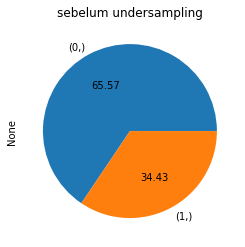

In [ ]:
ax=kelas.value_counts().plot.pie(autopct='%.2f')
_=ax.set_title("sebelum undersampling")

Setelah dicek, dapat terlihat bahwa data imbalanced dengan kelas 1 sebanyak 34.43% dan data kelas 0 65.57%. Hal ini dapat menyebabkan overfitting

Untuk menghandle imbalanced data terdapat beberapa cara, seperti oversampling dan undersampling dengan tujuan jumlah kelas mayoritas menjadi sama dengan kelas minoritas dengan mengurangi ukuran kelas mayoritas. Saya memilih untuk menggunakan metode undersampling nearmiss karena saat saya coba, akurasi tidak berubah (tetap).

'

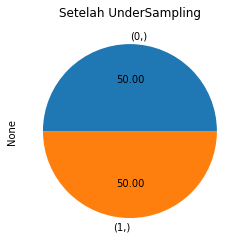

In [ ]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()
x_res, y_res=nm.fit_resample(fitur, kelas)

ax=y_res.value_counts().plot.pie(autopct='%.2f')
_=ax.set_title("Setelah UnderSampling")

In [ ]:
countClass0 = (y_res == 0).sum()
countClass1 = (y_res == 1).sum()
print("Jumlah class 0 = ",countClass0)
print("Jumlah class 1 = ",countClass1)

Jumlah class 0 =  Outcome    251
dtype: int64
Jumlah class 1 =  Outcome    251
dtype: int64


Pada hasil undersampling maka klas data yang memiliki presentasi akan diturunkan sehingga menjadi sama dengan data yang memiliki presentasi rendah sehingga memiliki presentasi yang sama 50% dan jumlah yang sama 251

Selanjutnya saya memisahkan data untuk training dan untuk testing, untuk training 70% dan untuk testing 30% dari data hasil undersampling

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_res, y_res, test_size=0.3, random_state=0)

# SVM

Selanjutnya membuat model Support Vector Machine



In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, Y_train.values.ravel())
model.support_vectors_

array([[0.52941176, 0.61809045, 0.46938776, ..., 0.30470348, 0.1263877 ,
        0.31666667],
       [0.29411765, 0.61306533, 0.63265306, ..., 0.33742331, 0.09052092,
        0.2       ],
       [0.52941176, 0.77386935, 0.55102041, ..., 0.2597137 , 0.03672075,
        0.4       ],
       ...,
       [0.41176471, 0.57286432, 0.42857143, ..., 0.29856851, 0.07685739,
        0.35      ],
       [0.29411765, 0.57788945, 0.75510204, ..., 0.70961145, 0.0559351 ,
        0.11666667],
       [0.29411765, 0.81407035, 0.81632653, ..., 0.39877301, 0.03116994,
        0.51666667]])

Menghitung F1 Score

In [ ]:
from sklearn.metrics import f1_score
y_pred = model.predict(X_test)
f1=f1_score(Y_test,y_pred)
f1

0.7534246575342466

Menghitung Akurasi

In [ ]:
from sklearn import metrics
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.7615894039735099


# K-NN

Menggunakan K-NN dengan mencoba nilai n dari 1-20 dan mendapatkan hasil akurasi maksimumnya

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
acc=0
n_max=0
for n in range(1,20):
  neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train.values.ravel())
  yhat=neigh.predict(X_test)
  x=metrics.accuracy_score(Y_test, yhat)
  if(x>acc):
    acc=x
    n_max=n
print("Max Accuracy : ",acc,"dengan n= ",n_max)

Max Accuracy :  0.7218543046357616 dengan n=  5


# ANN

menggunakan 2
hidden layer dengan masing-masing 10 neuron dengan fungsi aktivasi logistic

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(activation='logistic', solver='lbfgs', alpha=1e-5,
 hidden_layer_sizes=(10, 10),random_state=0, max_iter=1000)
clf.fit(X_train, Y_train.values.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=(10, 10),
              max_iter=1000, random_state=0, solver='lbfgs')

In [ ]:
from sklearn.metrics import accuracy_score
ymodel=clf.predict(X_train)
accuracy_score(Y_train,ymodel)

0.9629629629629629

dari hasil forum kaggle, kebanyakan hasil akurasi untuk dataset diabetes ini berkisaran 70%-78%, jadi saya mencoba untuk menggunakan dataset lain.

**Klasifikasi dalam asteroseismologi**

URL DataSet : https://www.kaggle.com/datasets/fernandolima23/classification-in-asteroseismology

Membaca data

In [ ]:
data2=pd.read_csv("classification_in_asteroseismology.csv")
data2.head()

,POP,Dnu,numax,epsilon
0,1,4.44780,43.06289,0.985
1,0,6.94399,74.07646,0.150
2,1,2.64571,21.57891,0.855
3,1,4.24168,32.13189,0.840
4,0,10.44719,120.37356,0.275


*   **DESKRIPSI DATA**
*   Dnu F8.5 (uHz) :Rata-rata pemisahan frekuensi besar dari mode dengan derajat yang sama dan urutan berurutan, {DELTA}nu
*   numax F9.5 (uHz) : Frekuensi daya osilasi maksimum
*   epsilon F7.3 : Lokasi mode l=0 (2)
*   Pop: [0/1] Population (1) : 0 = RGB
1 = HeB
RGB (Red Giant Branch)
HeB (Helium Burning)

Memisahkan kolom fitur dan kolom kelas

In [ ]:
p=["Dnu","numax","epsilon"]
q=['POP']
fitur2=data2[p]
kelas2=data2[q]

Cek apakah ada nilai pada kolom fitur yang bernilai 0

In [ ]:
count = (data2== 0).sum()
count

POP        288
Dnu          0
numax        0
epsilon      0
dtype: int64

Cek apakah data merupakan data imbalanced atau data balanced

In [ ]:
countClass0 = (kelas2 == 0).sum()
countClass1 = (kelas2 == 1).sum()
print("Jumlah class 0 = ",countClass0)
print("Jumlah class 1 = ",countClass1)

Jumlah class 0 =  POP    288
dtype: int64
Jumlah class 1 =  POP    713
dtype: int64


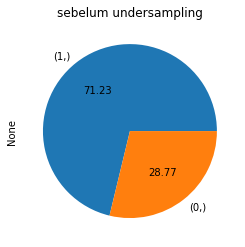

In [ ]:
ax=kelas2.value_counts().plot.pie(autopct='%.2f')
_=ax.set_title("sebelum undersampling")

Untuk menghandle imbalanced data terdapat beberapa cara, seperti oversampling dan undersampling dengan tujuan jumlah kelas mayoritas menjadi sama dengan kelas minoritas dengan mengurangi ukuran kelas mayoritas. Saya memilih untuk menggunakan metode undersampling nearmiss karena saat saya coba, akurasi tidak berubah (tetap).

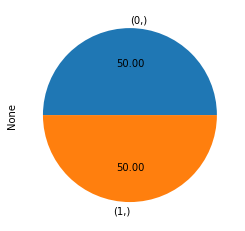

In [ ]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()
x_res2, y_res2 =nm.fit_resample(fitur2, kelas2)

ax2=y_res2.value_counts().plot.pie(autopct='%.2f')
_=ax.set_title("Setelah UnderSampling")

In [ ]:
countClass0 = (y_res2 == 0).sum()
countClass1 = (y_res2 == 1).sum()
print("Jumlah class 0 = ",countClass0)
print("Jumlah class 1 = ",countClass1)

Jumlah class 0 =  POP    288
dtype: int64
Jumlah class 1 =  POP    288
dtype: int64


Setelah dilakukan undersampling, ukuran kelas minoritas menjadi sama dengan ukuran kelas mayoritas, kelas mayoritas ukurannya mengecil

Memisahkan data untuk training dan untuk testing. 80% untuk training dan 20% untuk testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(x_res2, y_res2, test_size=0.2, random_state=0)

# SVM

Membuat model Support Vector Machine dengan kernel linear

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel = "linear").fit(X_train2, Y_train2.values.ravel())

Mencetak f1 score

In [ ]:
y_pred2 = svm_model.predict(X_test2)
f1_2=f1_score(Y_test2,y_pred2)
f1_2

0.9322033898305084

Mencetak nilai akurasi

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_test2, y_pred2))

Accuracy: 0.9310344827586207


menggunakan 2
hidden layer dengan masing-masing 10 neuron dengan fungsi aktivasi logistic

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(activation='logistic', solver='lbfgs', alpha=1e-5,
 hidden_layer_sizes=(10, 10),random_state=0, max_iter=1000)
clf.fit(X_train2, Y_train2.values.ravel())

MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=(10, 10),
              max_iter=1000, random_state=0, solver='lbfgs')

In [ ]:
ymodel3=clf.predict(X_train2)
accuracy_score(Y_train2,ymodel3)

0.9478260869565217

In [ ]:
data.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object

In [ ]:
data2.dtypes

POP          int64
Dnu        float64
numax      float64
epsilon    float64
dtype: object